In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy.physics.units import centimeter
from sympy.physics.units import convert_to
from sympy.physics.units import second
from sympy.physics.units import electronvolt
from sympy.physics.units import kelvin
from sympy.physics.units import watt
from sympy.physics.units import nanometer
from sympy.physics.units import meter

import lss

# Black Body (Planck) (Analytics)

In [23]:
B_lambda = sy.Symbol('B_\\lambda')
c = sy.Symbol('c')
F_lambda = sy.Symbol('F_\\lambda')
h = sy.Symbol('h')
k_B = sy.Symbol('k_B')
slambda = sy.Symbol('\\lambda')
T = sy.Symbol('T')

constants = {
    c: 2.99792458e10 * centimeter * second**(-1),
    h: 4.135667696e-15 * electronvolt * second,
    k_B: 8.617333262e-5 * electronvolt * kelvin**(-1), # eV * K^{-1}
}

In [25]:
B_lambda_ = (
    + 2 * h * c**2
    / slambda**5
    / (sy.exp(h * c / (slambda * k_B * T)) - 1)
)
sy.Eq(B_lambda, B_lambda_)

Eq(B_\lambda, 2*c**2*h/(\lambda**5*(exp(c*h/(T*\lambda*k_B)) - 1)))

In [26]:
F_lambda_ = sy.pi * B_lambda
sy.Eq(F_lambda, F_lambda_)

Eq(F_\lambda, pi*B_\lambda)

In [29]:
T_ = 5778 * kelvin
sy.Eq(T, T_)

Eq(T, 5778*kelvin)

In [30]:
F_lambda__ = F_lambda_.subs(B_lambda, B_lambda_).subs(constants).subs(T, T_).n()
sy.Eq(sy.Symbol('F_\\lambda(\\lambda, 5778)'), F_lambda__)

Eq(F_\lambda(\lambda, 5778), 23354302.9648059*electronvolt*centimeter**2/(second*\lambda**5*(exp(0.000249009497612802*centimeter/\lambda) - 1.0)))

In [50]:
F_lambda___ = lambda slambda_: convert_to(
    F_lambda__.subs(slambda, slambda_ * nanometer).simplify(),
    watt * meter**(-2) * nanometer**(-1)
).coeff(watt * meter**(-2) * nanometer**(-1))

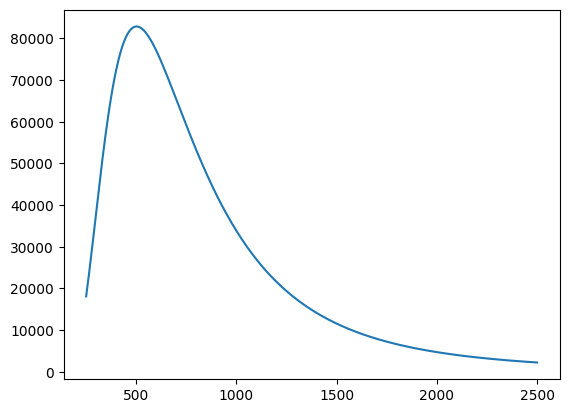

In [52]:
# wavelengths = np.linspace(black_body.min_wavelength, 2500, int(1e3))
wavelengths = np.linspace(250, 2500, int(1e3))
spectral_flux_densities = np.array([F_lambda___(l) for l in wavelengths])

plt.plot(wavelengths, spectral_flux_densities)

# Black Body (Planck) (Numeric)

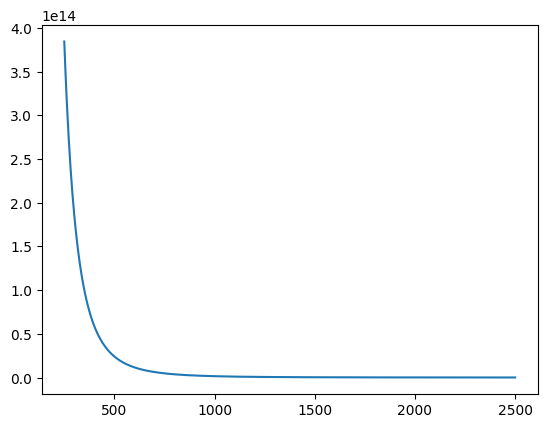

In [6]:
black_body = lss.BlackBodyPlanck()
black_body.temperature = 5778.0

# wavelengths = np.linspace(black_body.min_wavelength, 2500, int(1e3))
wavelengths = np.linspace(250, 2500, int(1e3))
spectral_flux_densities = np.array([black_body(l) for l in wavelengths])

plt.plot(wavelengths, spectral_flux_densities)

# Sun (Gueymard)

In [ ]:
sun_gueymard = lss.SunGueymard()

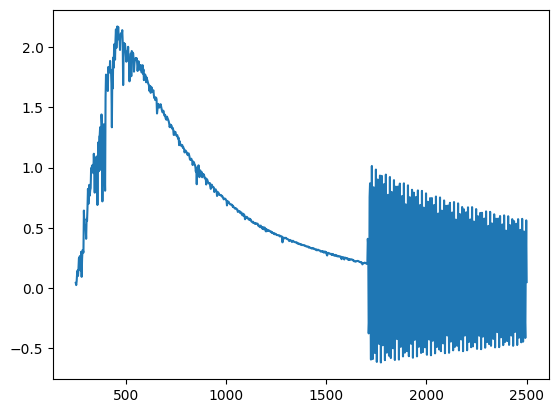

In [10]:
# wavelengths = np.linspace(sun_gueymard.min_wavelength, sun_gueymard.max_wavelength, int(1e3))
wavelengths = np.linspace(250, 2500, int(1e3))
spectral_flux_densities = np.array([sun_gueymard(l) for l in wavelengths])

plt.plot(wavelengths, spectral_flux_densities)